#Project 3: Linear Regression Model Development and Evaluation
**Project Title:** Predictive Modeling: Linear Regression for Continuous Target Variable.

**Project Goal:** To develop, train, and rigorously evaluate a Linear Regression model for predicting a continuous target variable, utilizing a benchmark regression dataset. This project aims to demonstrate proficiency in model training, hyperparameter tuning (implicitly, by using a standard model), performance metric calculation, and result visualization.
Objectives:
1.	Dataset Acquisition and Preparation:
o	Acquire and load a suitable regression dataset (e.g., Boston Housing dataset or a comparable alternative, ensuring ethical data usage if using Boston Housing).
o	Perform initial data inspection and necessary basic cleaning to ensure readiness for model training.
2.	Data Splitting for Model Validation:
o	Split the prepared dataset into distinct training and testing sets, adhering to an 80/20 ratio. This will ensure robust model evaluation on unseen data.
3.	Linear Regression Model Training and Evaluation:
o	Model Training: Train a Linear Regression model using the designated training dataset.
o	Prediction Generation: Generate predictions on the held-out testing dataset using the trained model.
o	Performance Metric Calculation: Calculate and report key regression evaluation metrics on the test data:
	Root Mean Squared Error (RMSE): A measure of the average magnitude of the errors.
	Mean Absolute Error (MAE): The average of the absolute errors.
	R-squared (R2): The proportion of the variance in the dependent variable that is predictable from the independent variables.
4.	Results Visualization:
o	Create a professional scatter plot visualizing the relationship between the predicted values and the actual values from the test set. Include a diagonal line (y=x) for reference to visually assess model accuracy.
Tools/Libraries:
•	Python 3.x
•	Pandas (for data handling)
•	NumPy (for numerical operations)
•	Scikit-learn (for model training, data splitting, and metrics: LinearRegression, train_test_split, mean_squared_error, mean_absolute_error, r2_score)
•	Matplotlib / Seaborn (for plotting)
Deliverables:
•	A well-documented Python script (.py or .ipynb) containing all steps from data loading to model evaluation and visualization.
•	A clear output of the calculated RMSE, MAE, and R2 scores on the test set.
•	A high-resolution image file (e.g., .png) of the "Predicted vs. Actual Values" plot.
•	Brief interpretation of the model's performance based on the calculated metrics and the visualization.
Success Criteria:
•	The selected dataset is loaded and split correctly.
•	The Linear Regression model is trained successfully.
•	All three required evaluation metrics (RMSE, MAE, R2) are accurately calculated and presented.
•	The "Predicted vs. Actual Values" plot is correctly generated, providing a clear visual representation of model fit.
•	The code is clean, readable, and reproducible.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


###1: Dataset Acquisition & Preparation

In [ ]:
from sklearn.datasets import fetch_california_housing

#fetch as pandas data fram
housing = fetch_california_housing(as_frame=True)


df = housing.frame

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Checking how many (rows , columns) as follow

print("In the data set (rows,columns) as ", df.shape)

In the data set (rows,columns) as  (20640, 9)


Above there are 20640 rows in the data set and  9 columns.

In [ ]:
#Checking data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


So as we see there are all numeric featurs.

In [ ]:
#checking missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


There is no any misiisng value in the data set.

In [ ]:
#summary statistics of numaric features
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df['MedHouseVal'].describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


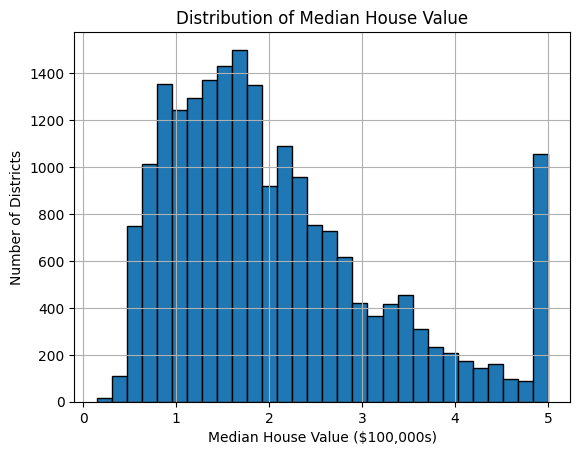

In [ ]:
df['MedHouseVal'].hist(bins=30, edgecolor='black')
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Number of Districts")
plt.title("Distribution of Median House Value")
plt.show()

Most areas have house values between $100,000 & $250,000. A lot of places hit the $500,000 limit in the data, so we don’t know their exact value. The prices are mostly on the lower side, with fewer very expensive areas.

###2. Data Splitting for Model Validation

I am splitting the data set into the test and train splitting using sklearn

In [ ]:
#Separate Features (X) and Target (y)

X = df.drop('MedHouseVal', axis=1)
Y = df['MedHouseVal']

In [ ]:
#Splitting into train and test split.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
#confirmation
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(16512, 8) (4128, 8)
(16512,) (4128,)


###3: Training the Linear Regression model

Here we will train our model on train data the model will be linear regression as after i train it will predict best possible weights(coef) and intercept(b).

In [ ]:
from sklearn.linear_model import LinearRegression



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Intercept (b):", model.intercept_)
print("Coefficients (m1...mn):", model.coef_)

Intercept (b): -37.02327770606409
Coefficients (m1...mn): [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


After traing i can see the model predict the weights coefitienst now when i will give new x values it will use these m, and b values to predict y

In [ ]:
#Predicting the X_test data

y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


###4 — Performance Metric Calculation

In [ ]:
#RMSE — Root Mean Squared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.7455813830127764


In [ ]:
#MAE — Mean Absolute Error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.5332001304956553


In [ ]:
# R² (R-squared)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)


R-squared (R2): 0.5757877060324508


The model explains about 57% of the changes in house prices based on the features.
The errors are in the range of $50k–$75k on average, which means the predictions are not perfect but still capture a good part of the trend.
The model could be improved by using more features or a different algorithm.

###visualization

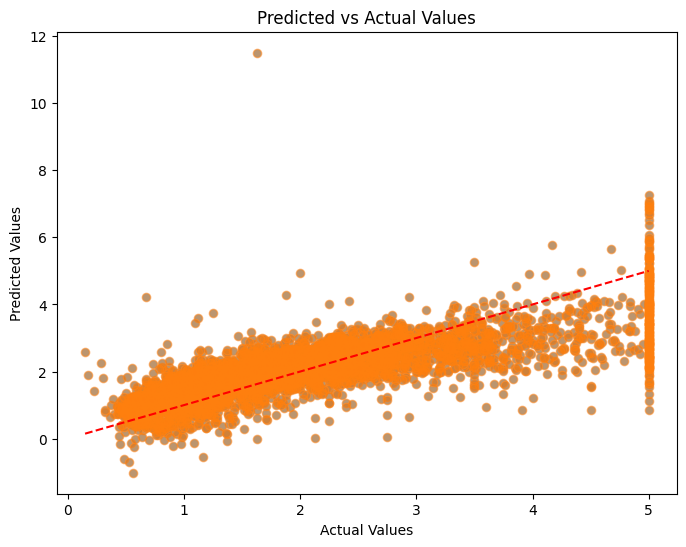

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

#reference line that is perfect prediction

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y = x line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

The scatter plot compares actual and predicted values. Most points are close to the red dashed line, which means the model predictions are somewhat accurate. However, there is still some spread, showing that the model makes errors for certain data points.

###Final Conclusion:


I make a model to guess house prices using the California housing dataset. This dataset is good for learning because it is clean, real-world, and has both numeric and location data. The model result show RMSE is 0.74, MAE is 0.53, and R² is 0.57. This mean the model is not perfect but can explain around half of the price changes. In the plot, many points are close to the line, so predictions are okay, but some points are far, so there are mistakes, mostly for very high or very low prices.

We can improve the model by trying other algorithms, adding more features, tuning parameters, or using feature scaling. This may help to make predictions closer to actual values.

